In [19]:
import numpy as np
import numpy.ma as ma
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.interpolate import make_interp_spline, BSpline

In [37]:
def stringToNumber(X): # X is list of numbers represented as strings, [2. 4. 5. 200. ...]
    l = X.split(' ')
    return [int(x.replace('.', '')) for x in l if x]
def wonGames(X):
    return [game for game in X if game != 500]
def CI95(X):
    X = stringToNumber(X)
    return  str(np.round(st.t.interval(alpha=0.95, df=len(X)-1, loc=np.mean(X), scale=st.sem(X)))).replace('.','').replace(' ',', ')
def CI95W(X):
    X = stringToNumber(X)
    X = wonGames(X)
    return  str(np.round(st.t.interval(alpha=0.95, df=len(X)-1, loc=np.mean(X), scale=st.sem(X)))).replace('.','').replace(' ',', ')
def CI99(X):
    X = stringToNumber(X)
    return  str(np.round(st.t.interval(alpha=0.99, df=len(X)-1, loc=np.mean(X), scale=st.sem(X)))[:]).replace('.','').replace(' ',', ')
def CI99W(X):
    X = stringToNumber(X)
    X = wonGames(X)
    return  str(np.round(st.t.interval(alpha=0.99, df=len(X)-1, loc=np.mean(X), scale=st.sem(X)))[:]).replace('.','').replace(' ',', ')
def doMagic(X):
    print(f'''
    95% won: {CI95W(X)} \n 
    99% won: {CI99W(X)} \n
    95% all: {CI95(X)} \n
    99% all: {CI99(X)}''')

def smooth(listX, old_x_as, new_x_as):
    listX = make_interp_spline(old_x_as, listX, k=2)  # type: BSpline
    listX = listX(new_x_as)
    return listX

def plot_number_of_won_games(m1,m2,m3,m4, title): # advanced, smartA, smartB, entropy
    x_as = [0,5,10,15,20,25,30]
    x_new = np.linspace(0, 30, 100)
    advanced_nwg = smooth(m1, x_as, x_new)
    smartA_nwg = smooth(m2, x_as, x_new)
    smartB_nwg = smooth(m3, x_as, x_new)
    entropy_nwg = smooth(m4, x_as, x_new)
    
    plt.figure(figsize=(12, 6), dpi=360)
    plt.tight_layout()
    plt.plot(x_new, advanced_nwg, label = "advanced")
    plt.plot(x_new, smartA_nwg, label = "smartA")
    plt.plot(x_new, smartB_nwg, label = "smartB")
    plt.plot(x_new, entropy_nwg, label = "Entropy")
    plt.ylabel('# of won games')
    plt.xlabel('Percentage Of Wrong Answers')
    plt.title('Number of won games "'+title+'"')
    plt.legend()
    plt.show()

def plot_avg_n_questions(m1,m2,m3,m4, m1l,m1h, m2l,m2h, m3l,m3h, m4l,m4h, title):
    x_as = [0,5,10,15,20,25,30]
    x_new = np.linspace(0, 30, 100)
    m1l = smooth(m1l, x_as, x_new)
    m1h = smooth(m1h, x_as, x_new)
    m2l = smooth(m2l, x_as, x_new)
    m2h = smooth(m2h, x_as, x_new)
    m3l = smooth(m3l, x_as, x_new)
    m3h = smooth(m3h, x_as, x_new)
    m4l = smooth(m4l, x_as, x_new)
    m4h = smooth(m4h, x_as, x_new)
    m1 = smooth(m1, x_as, x_new)
    m2 = smooth(m2, x_as, x_new)
    m3 = smooth(m3, x_as, x_new)
    m4 = smooth(m4, x_as, x_new)
    
    plt.figure(figsize=(12, 6), dpi=360)
    plt.tight_layout()
    plt.plot(x_new, m1,label = "advanced")
    plt.fill_between(x_new, (m1l), (m1h), antialiased=True, color='blue', alpha=0.1)
    plt.plot(x_new, m2, label = "smartA")
    plt.fill_between(x_new, (m2l), (m2h), antialiased=True, color='orange', alpha=0.1)
    plt.plot(x_new, m3, label = "smartB")
    plt.fill_between(x_new, (m3l), (m3h), antialiased=True, color='green', alpha=0.1)
    plt.plot(x_new, m4, label = "Entropy")
    plt.fill_between(x_new, (m4l), (m4h), antialiased=True, color='red', alpha=0.1)
    plt.ylabel('Average # Of Asked Questions')
    plt.xlabel('Percentage Of Wrong Answers')
    plt.title(title)
    plt.legend()
    plt.show()
    
def average_lists(multiple_lists):
    arrays = [np.array(x) for x in multiple_lists]
    return [np.mean(k) for k in zip(*arrays)]

## Entity 1: Grey’s Anatomy:

1. number of won games # nwg

[3.0, 7.0, 3.0, 9.5]

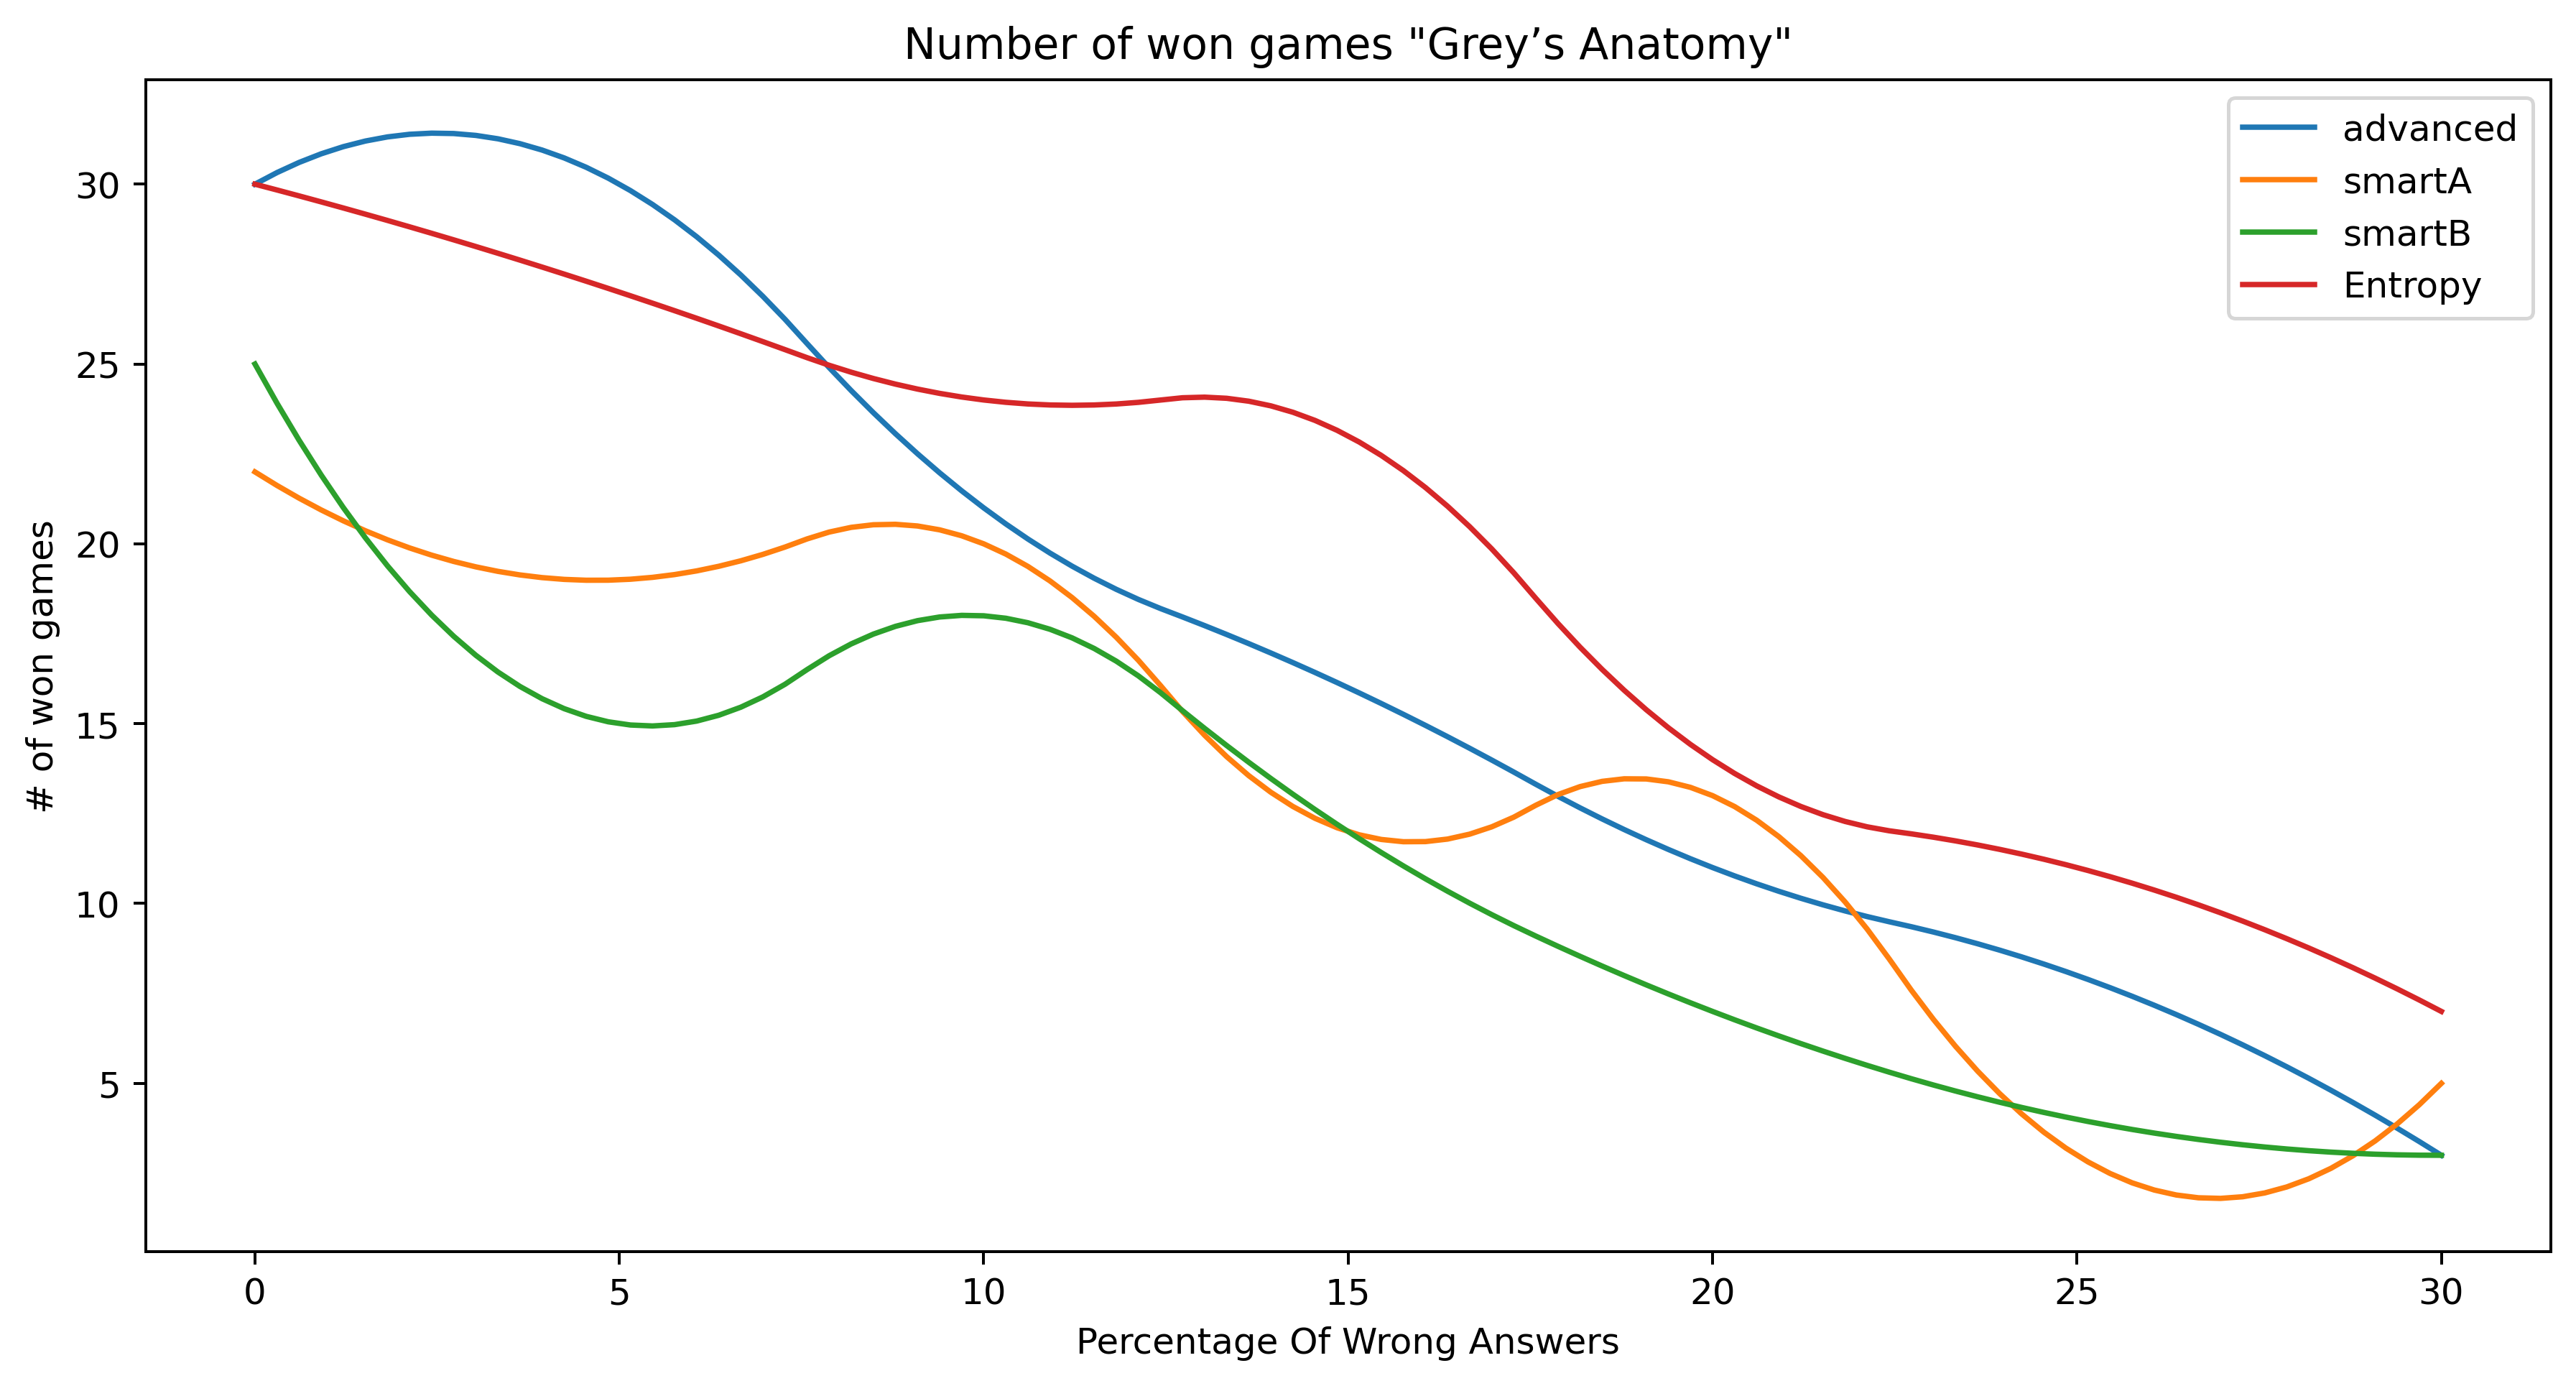

In [22]:
advanced_nwg1 = [30,30,21,16,11,8,3]
smartA_nwg1 = [22,19,20,12,13,3,5]
smartB_nwg1 = [25,15,18,12,7,4,3]
entropy_nwg1 = [30,27,24,23,14,11,7]

plot_number_of_won_games(advanced_nwg1, smartA_nwg1, smartB_nwg1, entropy_nwg1, 'Grey’s Anatomy')

1. Average Number Of Asked Questions # avgq

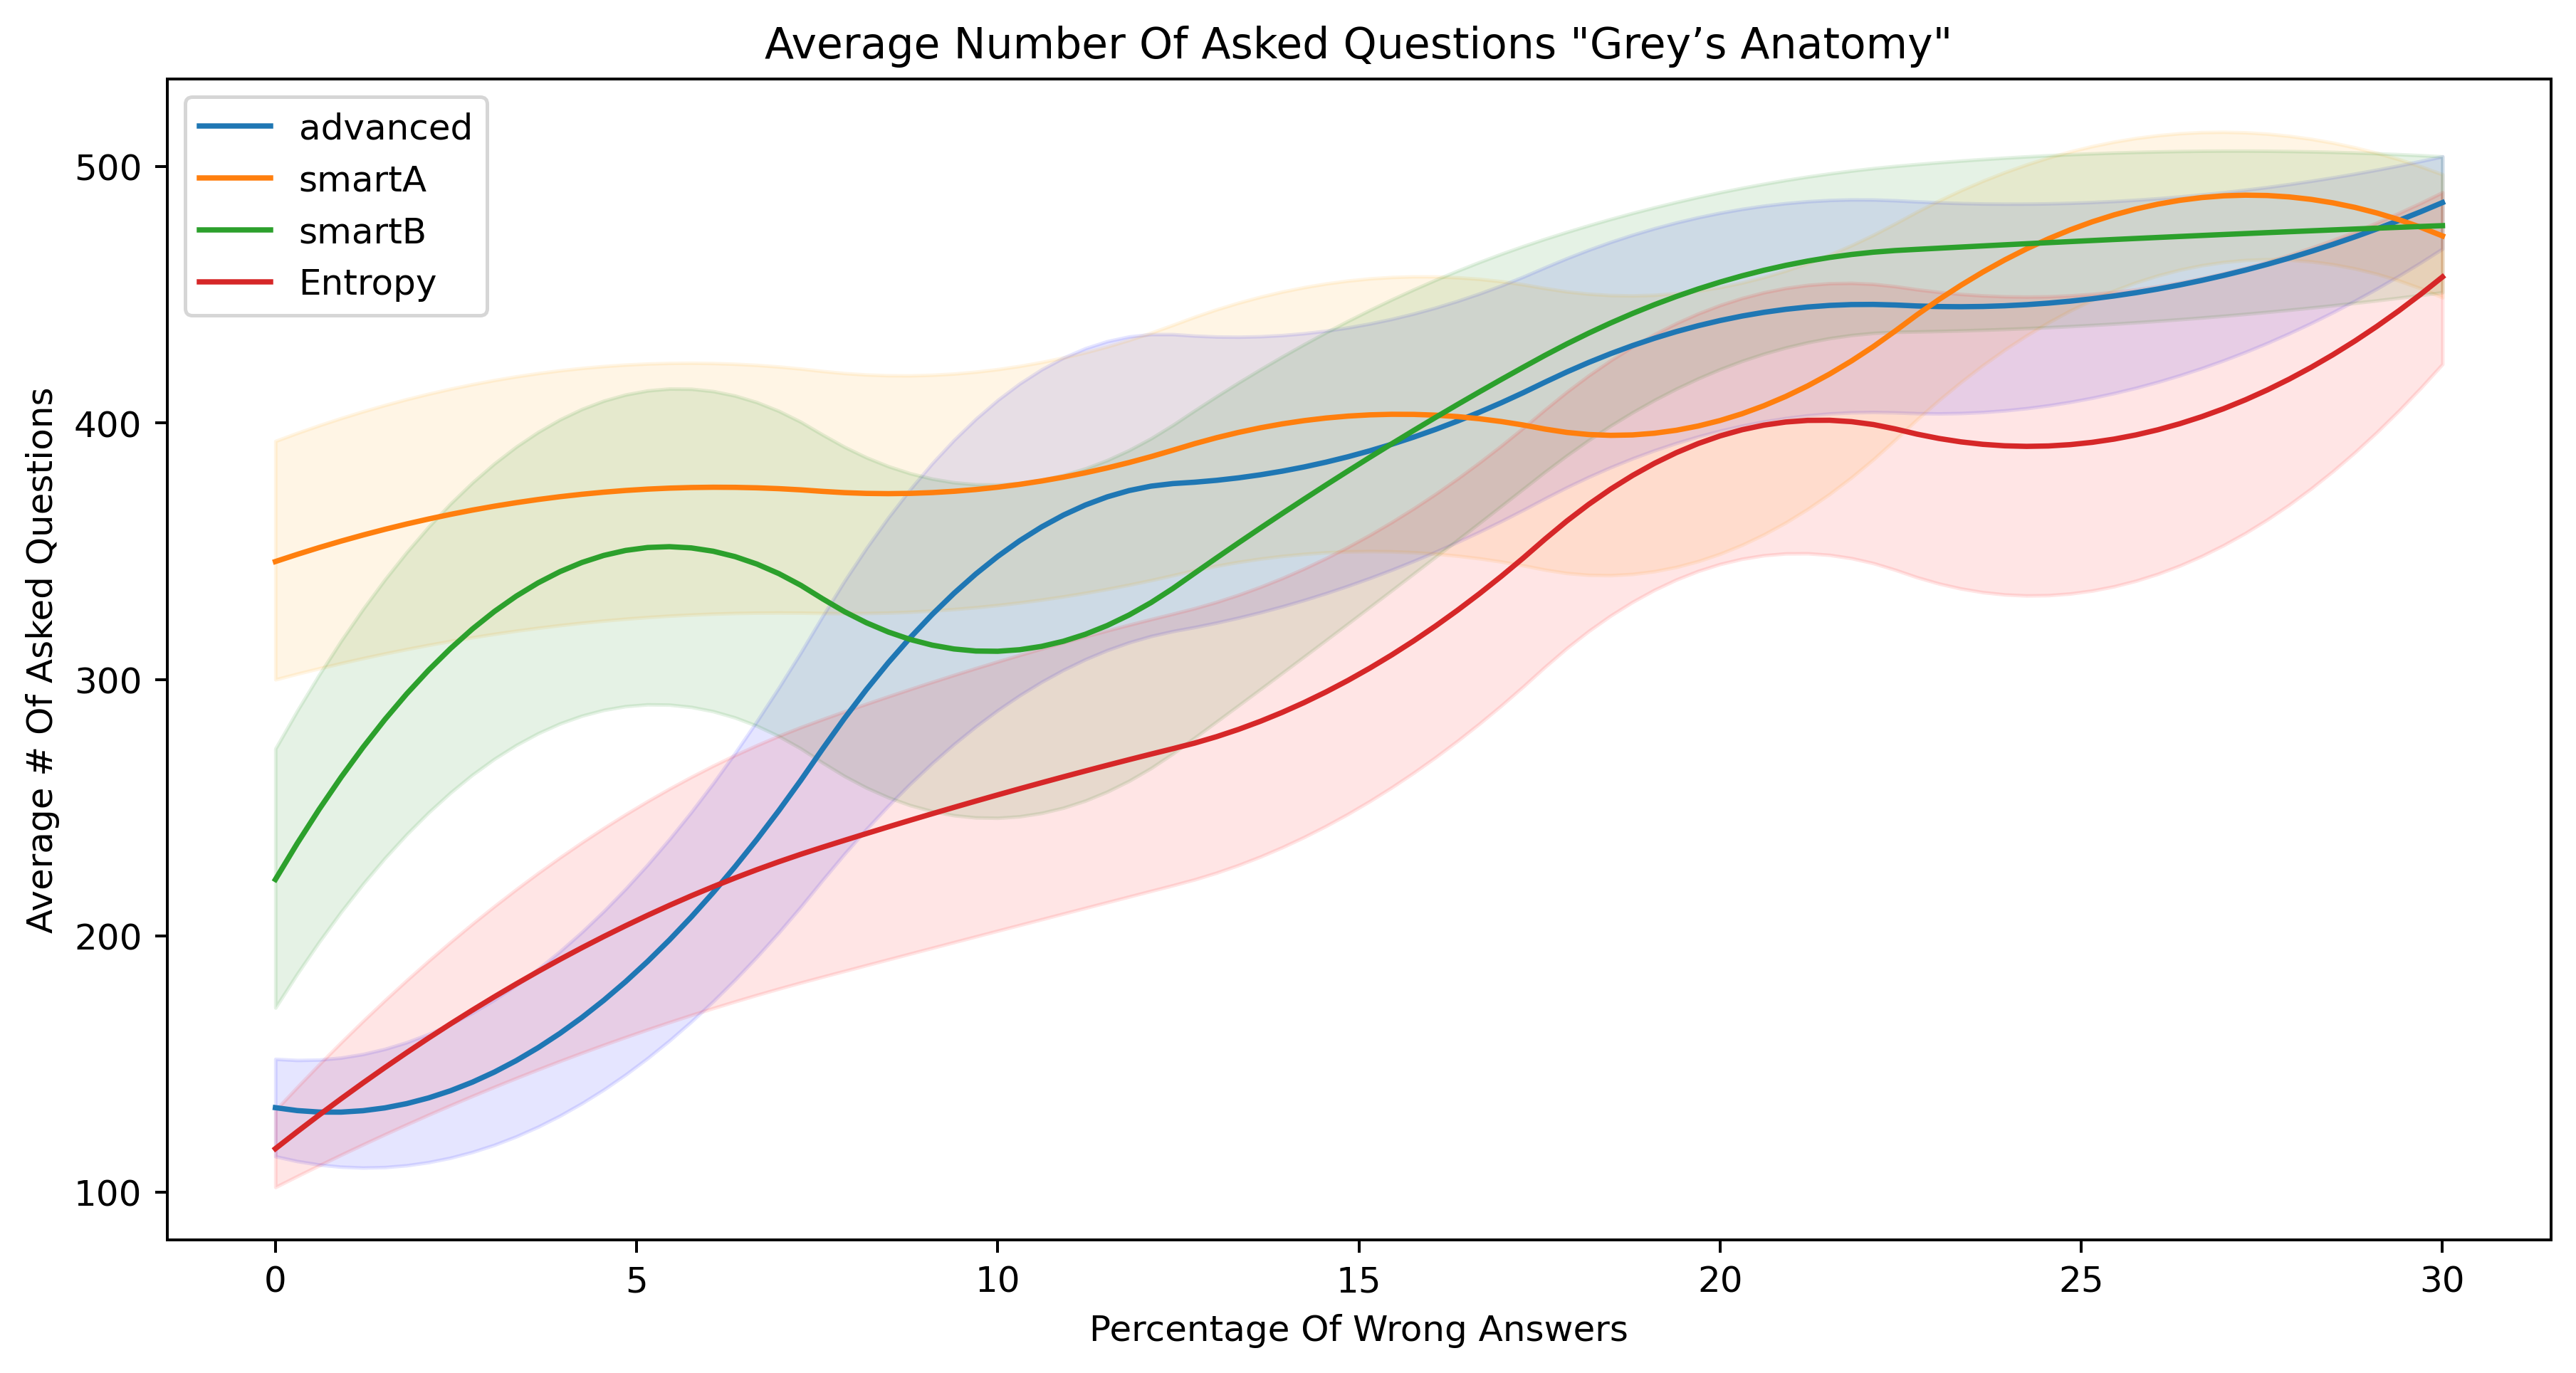

In [23]:
advanced_avgq1 = [133,186,348,388,440,448,486]
smartA_avgq1 = [346,374,375,403,401,477,473]
smartB_avgq1 = [222,351,311,384,455,471,477]
entropy_avgq1 = [117,206,255,302,395,392,457]

advanced_avgq_low1 = [114, 149, 288, 338, 397, 409, 468]
advanced_avgq_high1 = [152, 223, 409, 438, 482, 486, 504]

smartA_avgq_low1 = [300,324,329,350,349,446,449]
smartA_avgq_high1 = [393,423,421,456,453,507,497]

smartB_avgq_low1 = [172, 290, 246, 325, 421, 438, 451]
smartB_avgq_high1 = [273, 412, 376, 442, 490, 505, 504]

entropy_avgq_low1 = [102, 162, 202, 250, 345, 334, 423]
entropy_avgq_high1 = [132, 250, 307, 354, 446, 450, 490]

plot_avg_n_questions(advanced_avgq1, smartA_avgq1, smartB_avgq1, entropy_avgq1, \
                     advanced_avgq_low1, advanced_avgq_high1, \
                     smartA_avgq_low1, smartA_avgq_high1, \
                     smartB_avgq_low1, smartB_avgq_high1, \
                     entropy_avgq_low1, entropy_avgq_high1, 'Average Number Of Asked Questions "Grey’s Anatomy"')

1. Average Number Of Asked Questions In Won Games # avgqw

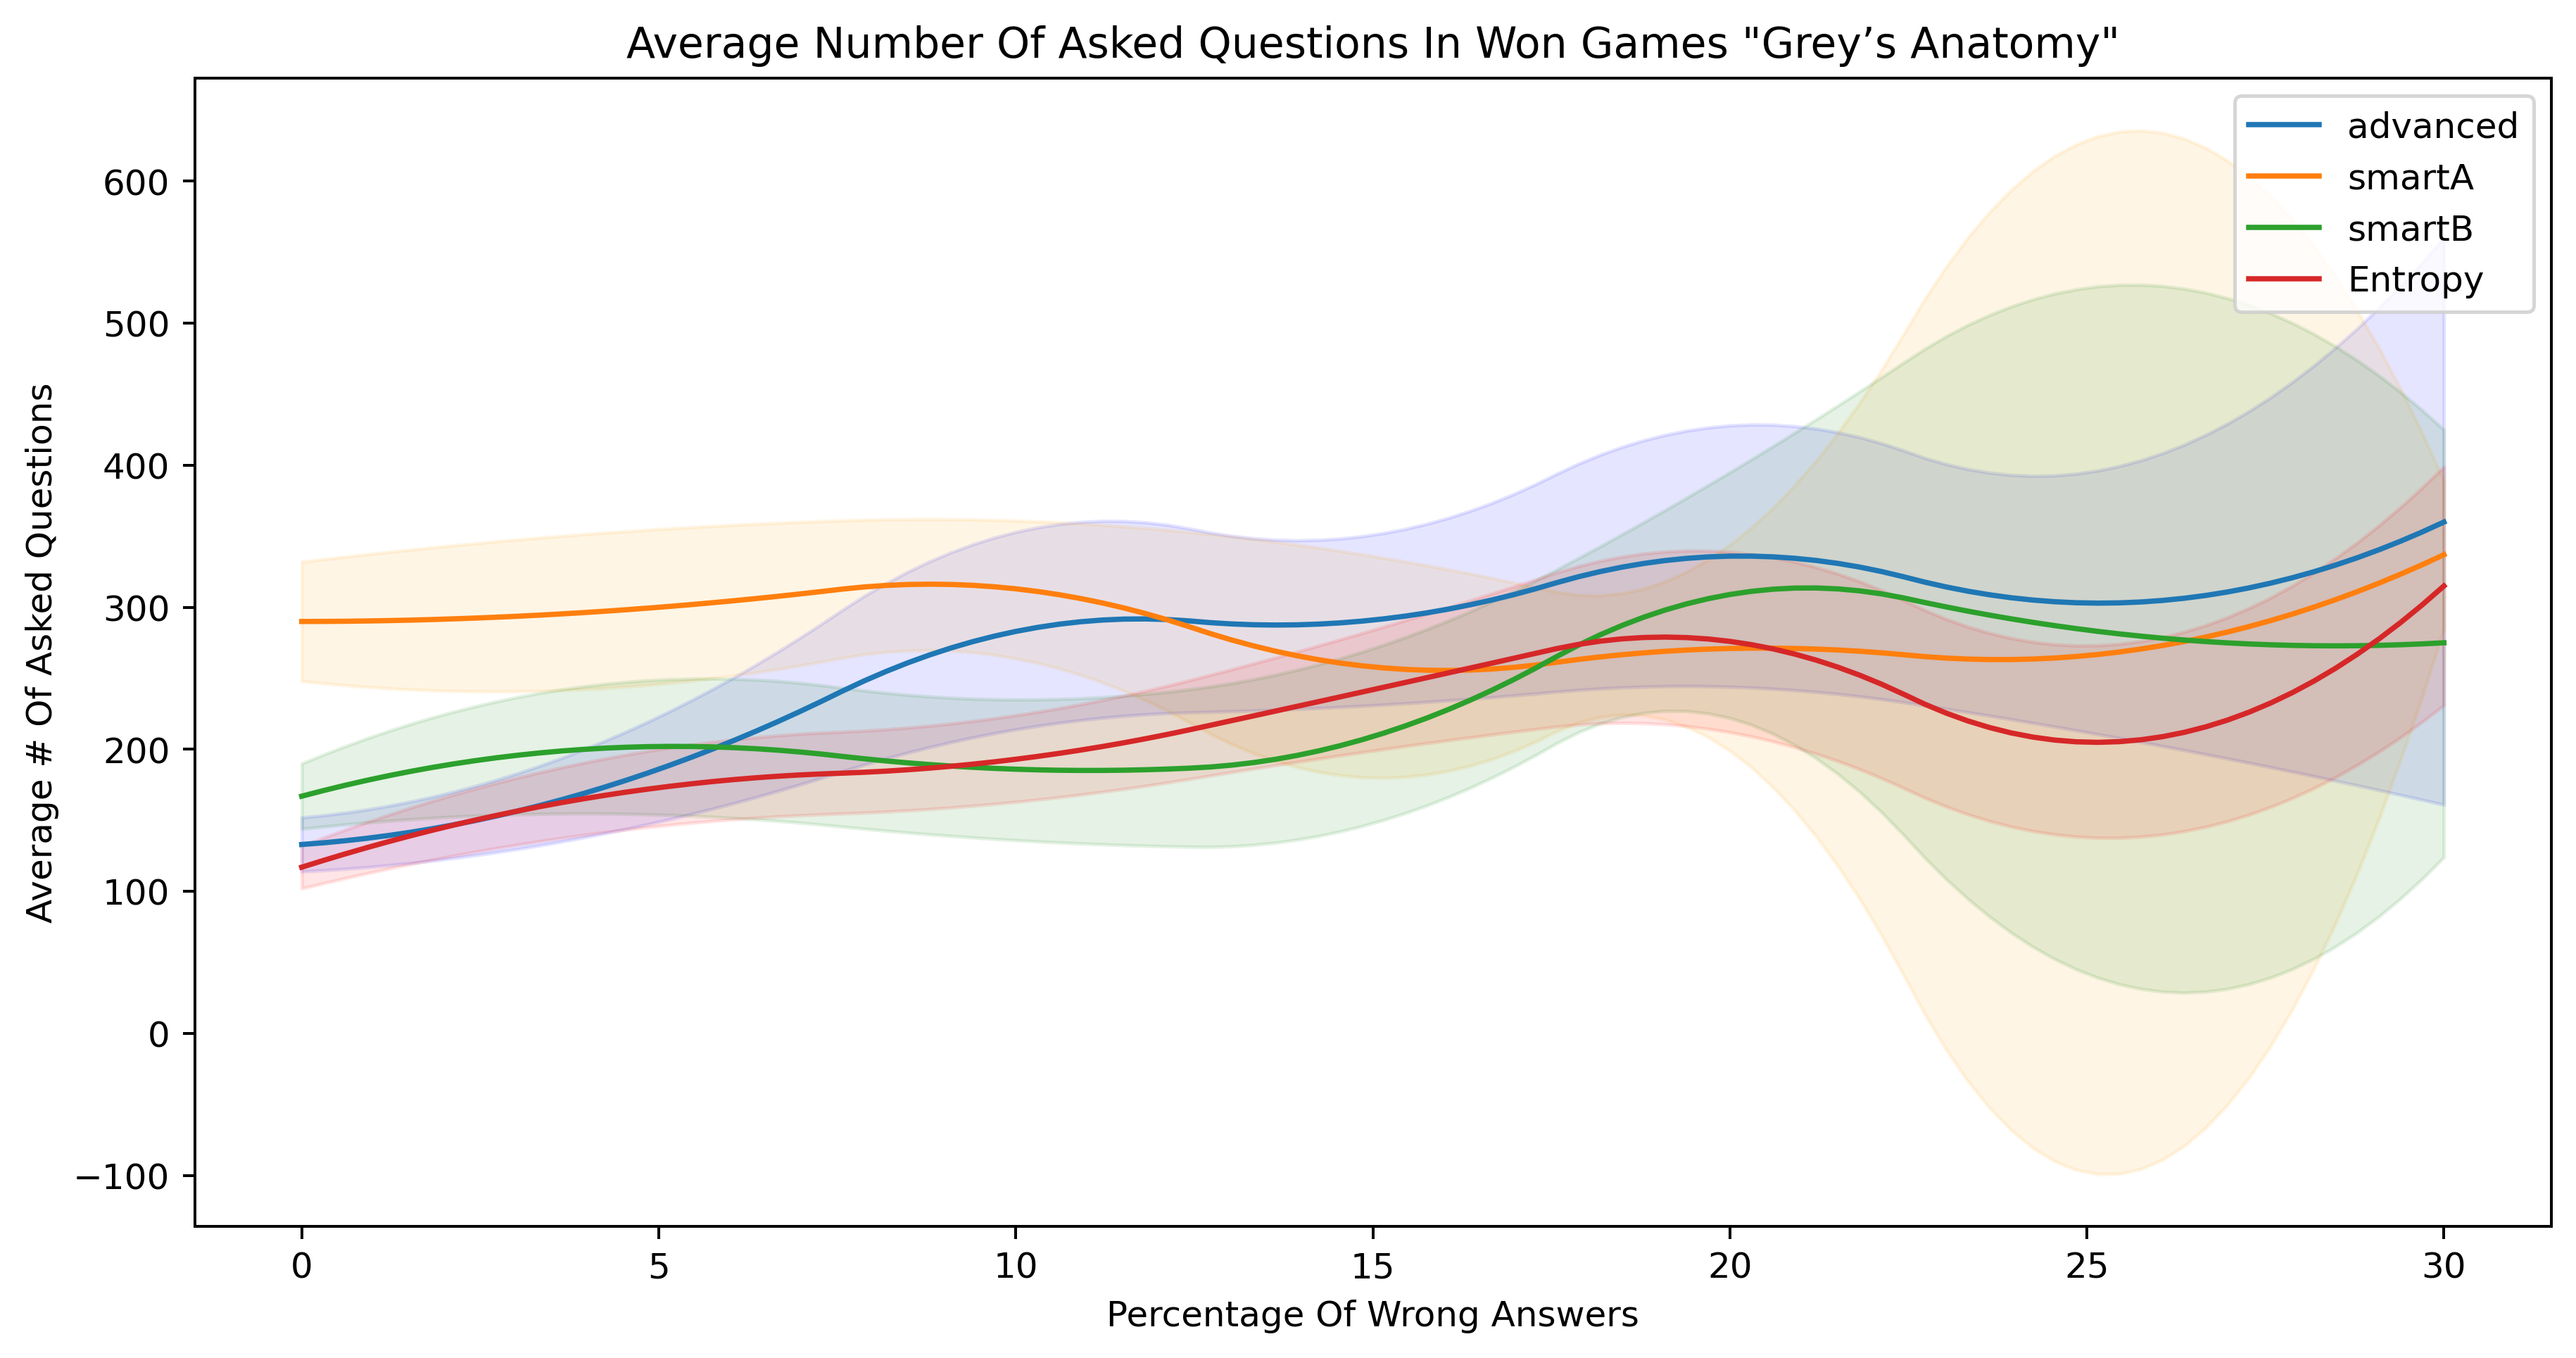

In [24]:
advanced_avgqw1 = [133,186,283,291,336,303,360]
smartA_avgqw1 = [290,300,313,258,271,266,337]
smartB_avgqw1 = [167,202,186,209,309,284,275]
entropy_avgqw1 = [117,173,  193 ,242,276,205,315]

advanced_avgqw_low1 = [114, 149, 214, 231, 244, 212, 161]
advanced_avgqw_high1 = [152, 223, 353, 351, 428, 395, 560]

smartA_avgqw_low1 = [248, 246, 264, 180, 199, -98, 285]
smartA_avgqw_high1 = [332, 355, 361, 336, 344, 629, 389]

smartB_avgqw_low1 = [144, 154, 136, 148, 222, 42, 124]
smartB_avgqw_high1 = [190, 249, 235, 271, 395, 525, 425]

entropy_avgqw_low1 = [102, 146, 163, 199, 212, 138, 231]
entropy_avgqw_high1 = [132, 200, 224, 284, 339, 273, 399]

plot_avg_n_questions(advanced_avgqw1, smartA_avgqw1, smartB_avgqw1, entropy_avgqw1, \
                     advanced_avgqw_low1, advanced_avgqw_high1, \
                     smartA_avgqw_low1, smartA_avgqw_high1, \
                     smartB_avgqw_low1, smartB_avgqw_high1, \
                     entropy_avgqw_low1, entropy_avgqw_high1, 'Average Number Of Asked Questions In Won Games "Grey’s Anatomy"')

## Entity 2: Robin Williams:

2. number of won games # nwg

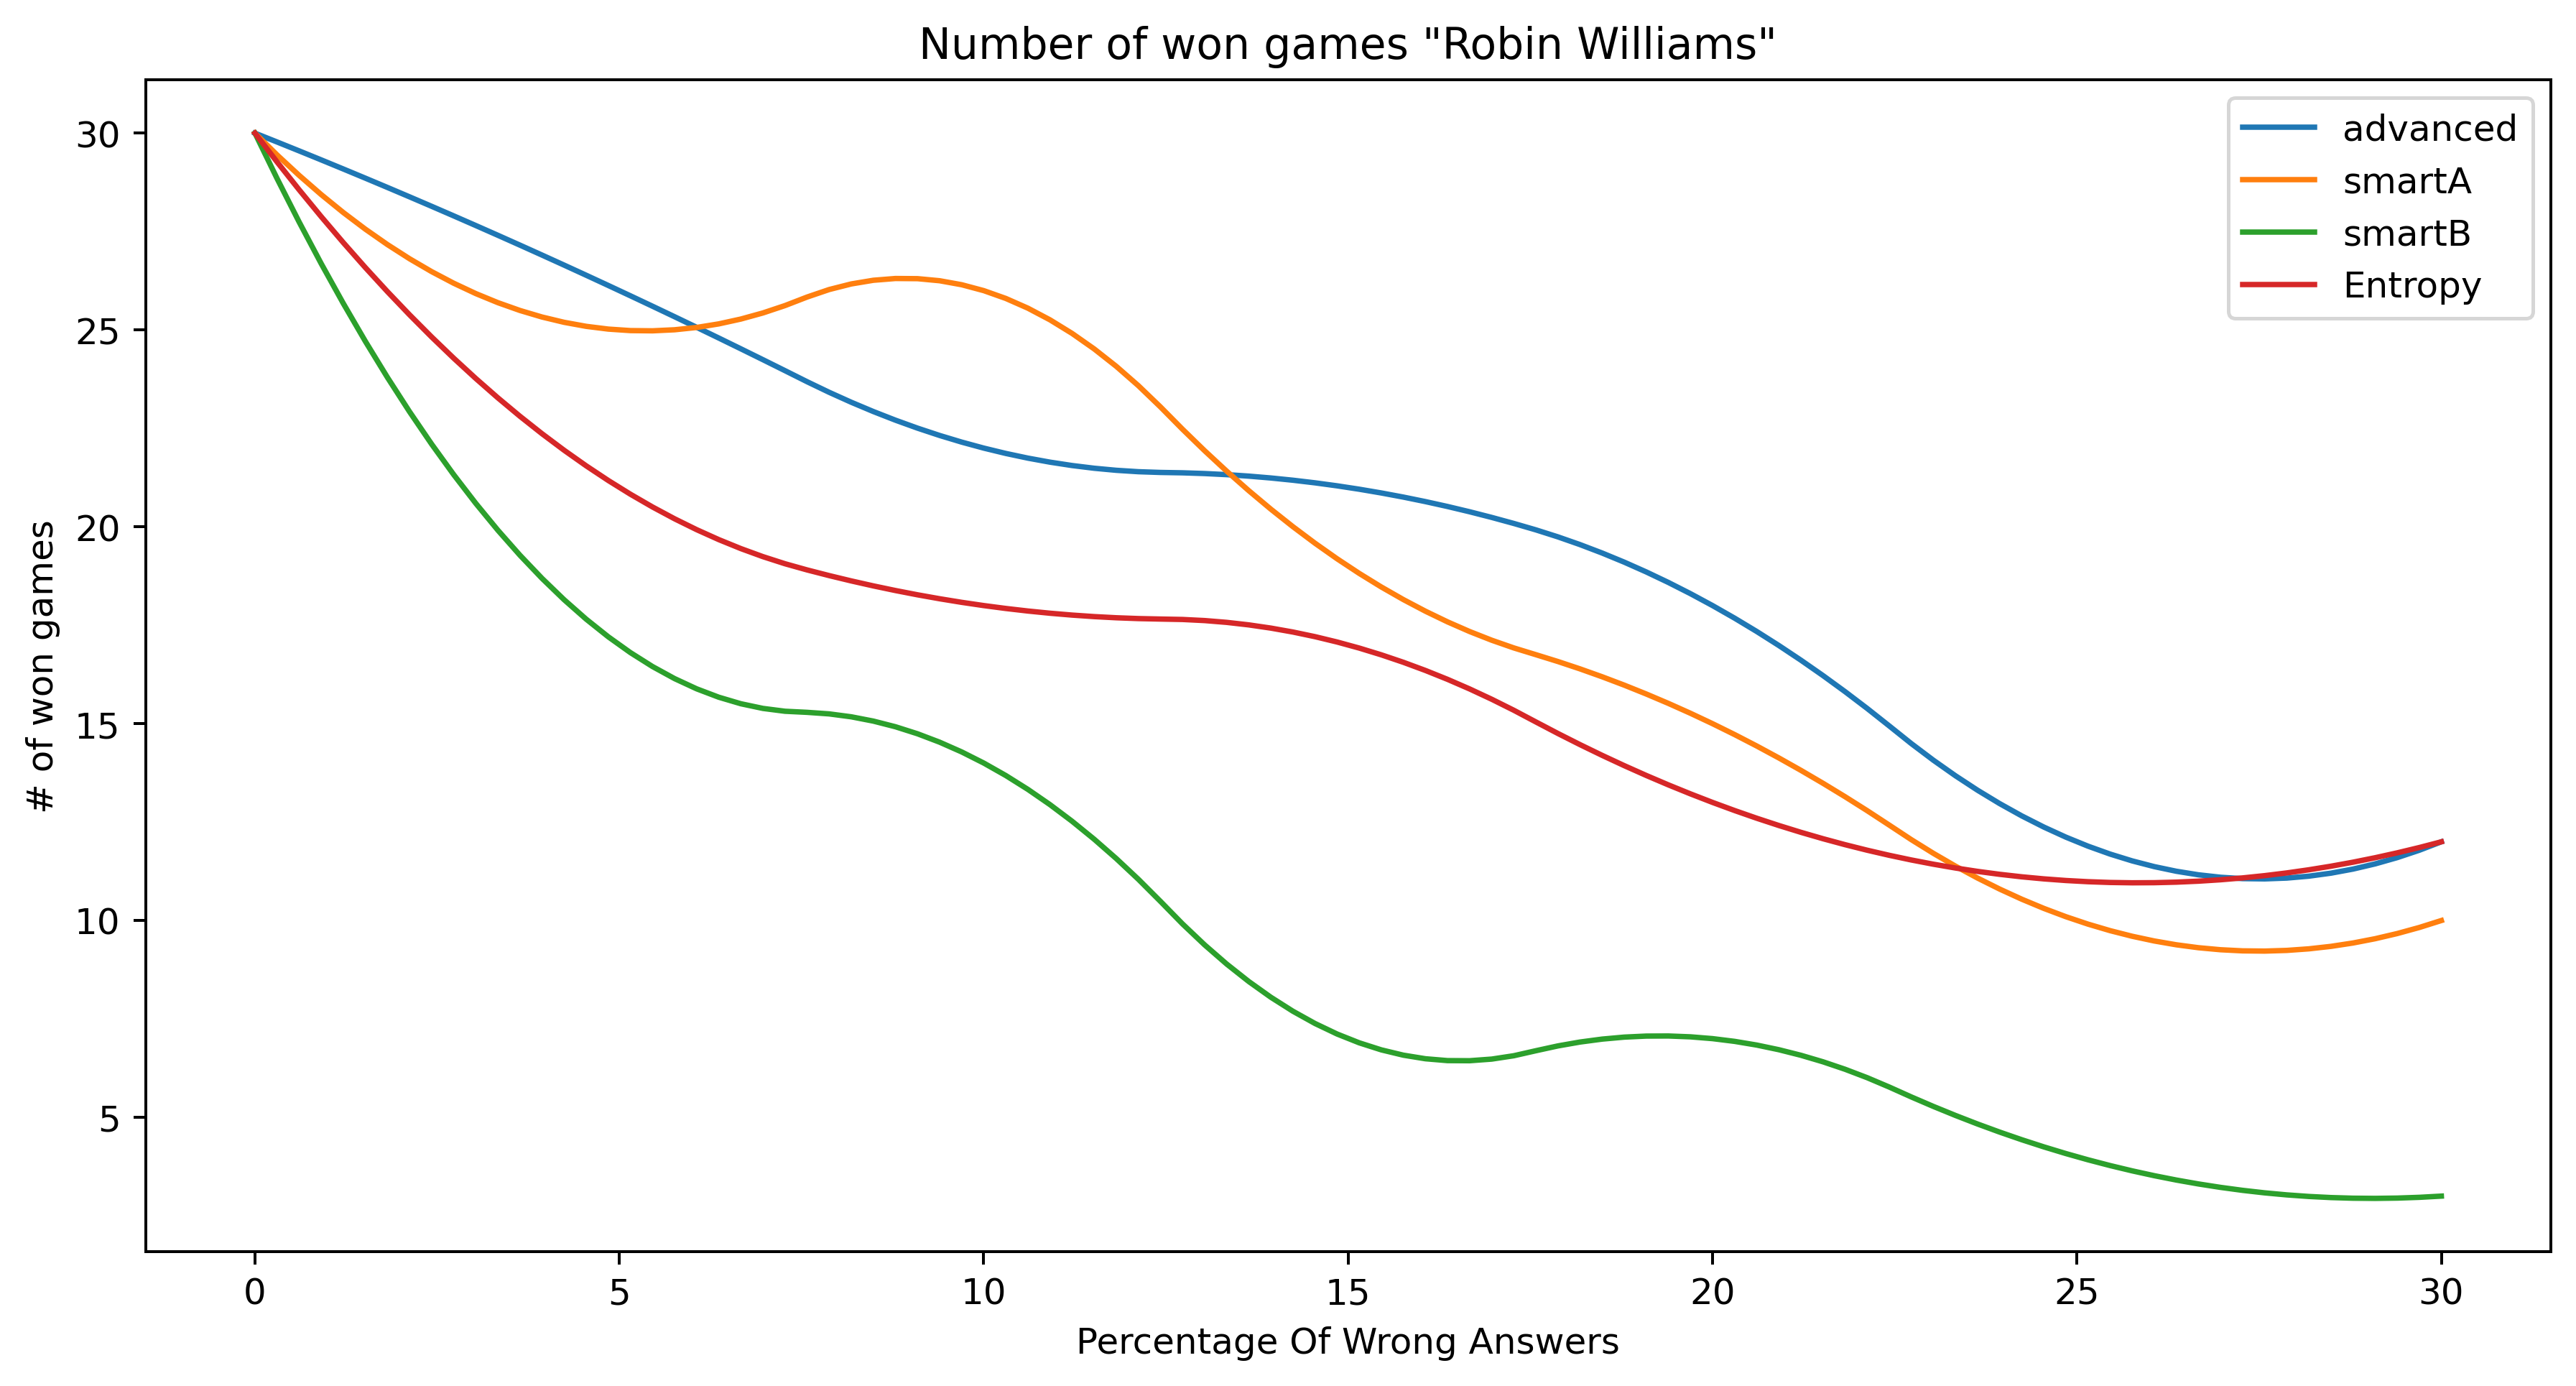

In [25]:
advanced_nwg2 = [30,26,22,21,18,12,12]
smartA_nwg2 = [30,25,26,19,15,10,10]
smartB_nwg2 = [30,17,14,7,7,4,3]
entropy_nwg2 = [30,21,18,17,13,11,12]

plot_number_of_won_games(advanced_nwg2, smartA_nwg2, smartB_nwg2, entropy_nwg2, 'Robin Williams')

2. Average Number Of Asked Questions # avgq

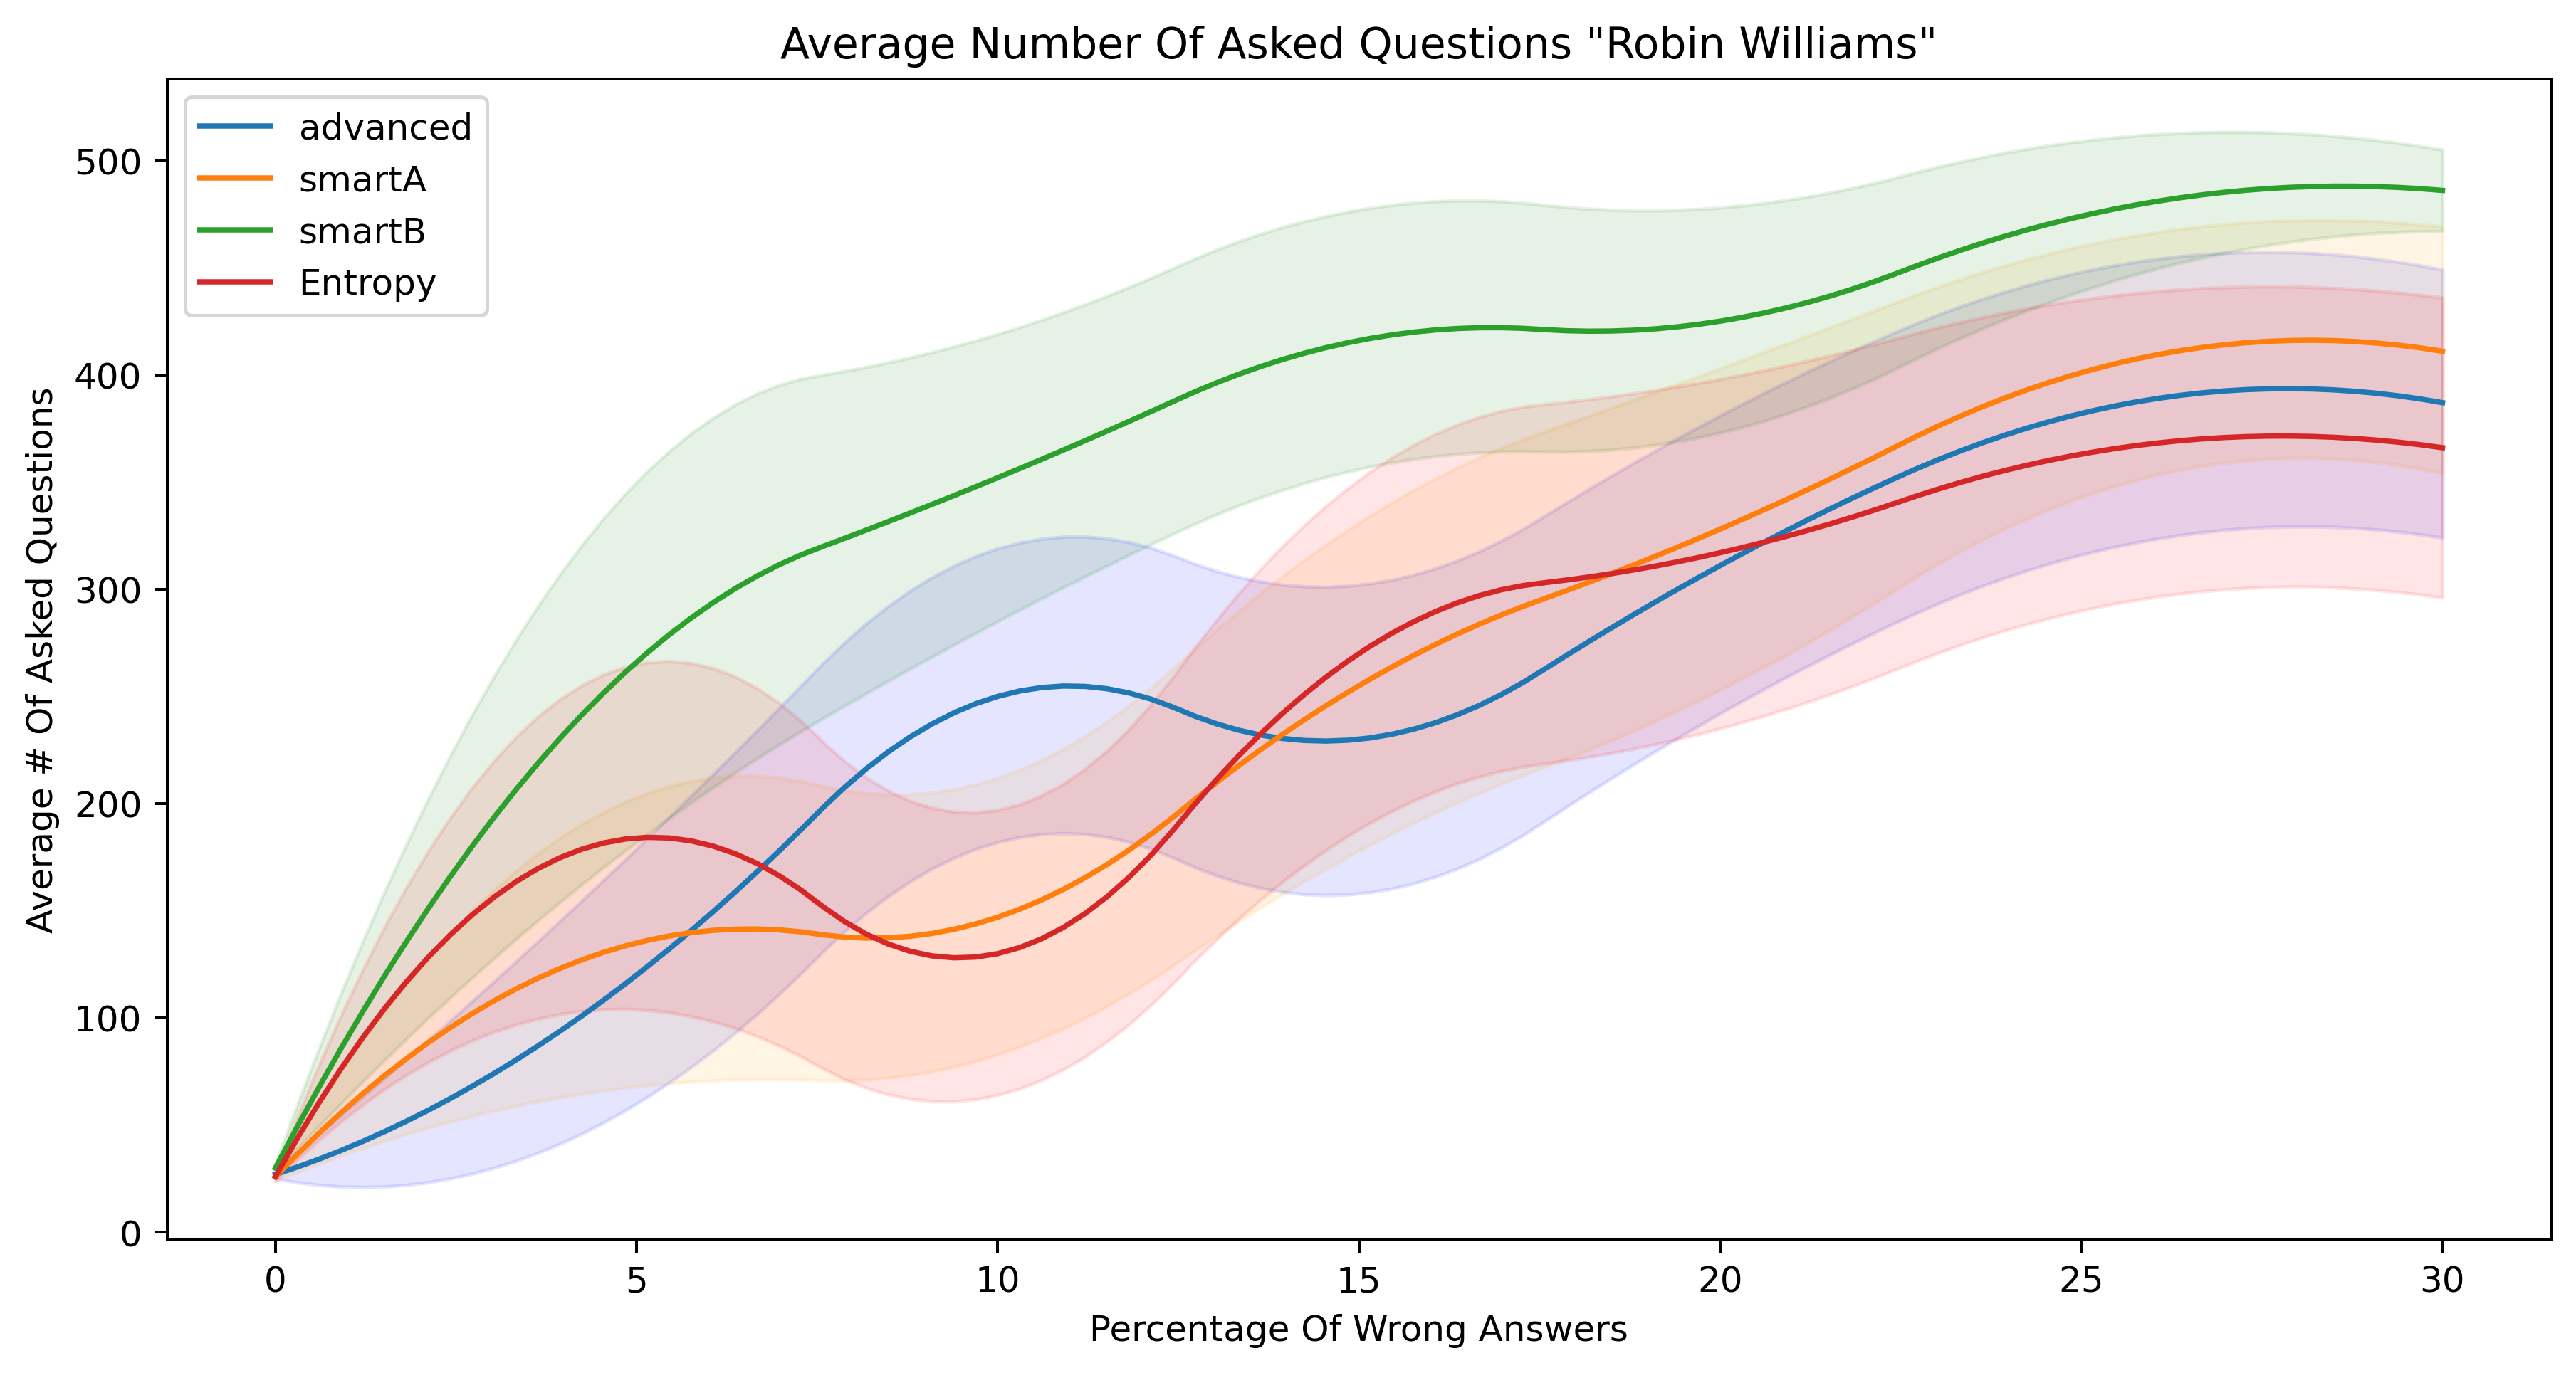

In [26]:
advanced_avgq_low2 = [25,60,182,158,242,316,324]
advanced_avgq_high2 = [29,179,319,302,381,448,449]

smartA_avgq_low2 = [24,68,83,178,253,343,354]
smartA_avgq_high2 = [27,203,212,331,403,460,469]

smartB_avgq_low2 = [28,182,285,356,373,439,467]
smartB_avgq_high2 = [32,350,419,477,478,509,505]

entropy_avgq_low2 = [24,104,64,188,235,290,296]
entropy_avgq_high2 = [28,265,197,351,398,435,436]

advanced_avgq2 = [27,120,250,230,311,382,387]
smartA_avgq2 = [26,135,147,255,328,401,411]
smartB_avgq2 = [30,266,352,416,425,474,486]
entropy_avgq2 = [26,184,130,270,317,363,366]

plot_avg_n_questions(advanced_avgq2, smartA_avgq2, smartB_avgq2, entropy_avgq2, \
                     advanced_avgq_low2, advanced_avgq_high2, \
                     smartA_avgq_low2, smartA_avgq_high2, \
                     smartB_avgq_low2, smartB_avgq_high2, \
                     entropy_avgq_low2, entropy_avgq_high2, 'Average Number Of Asked Questions "Robin Williams"')

2. Average Number Of Asked Questions In Won Games # avgqw

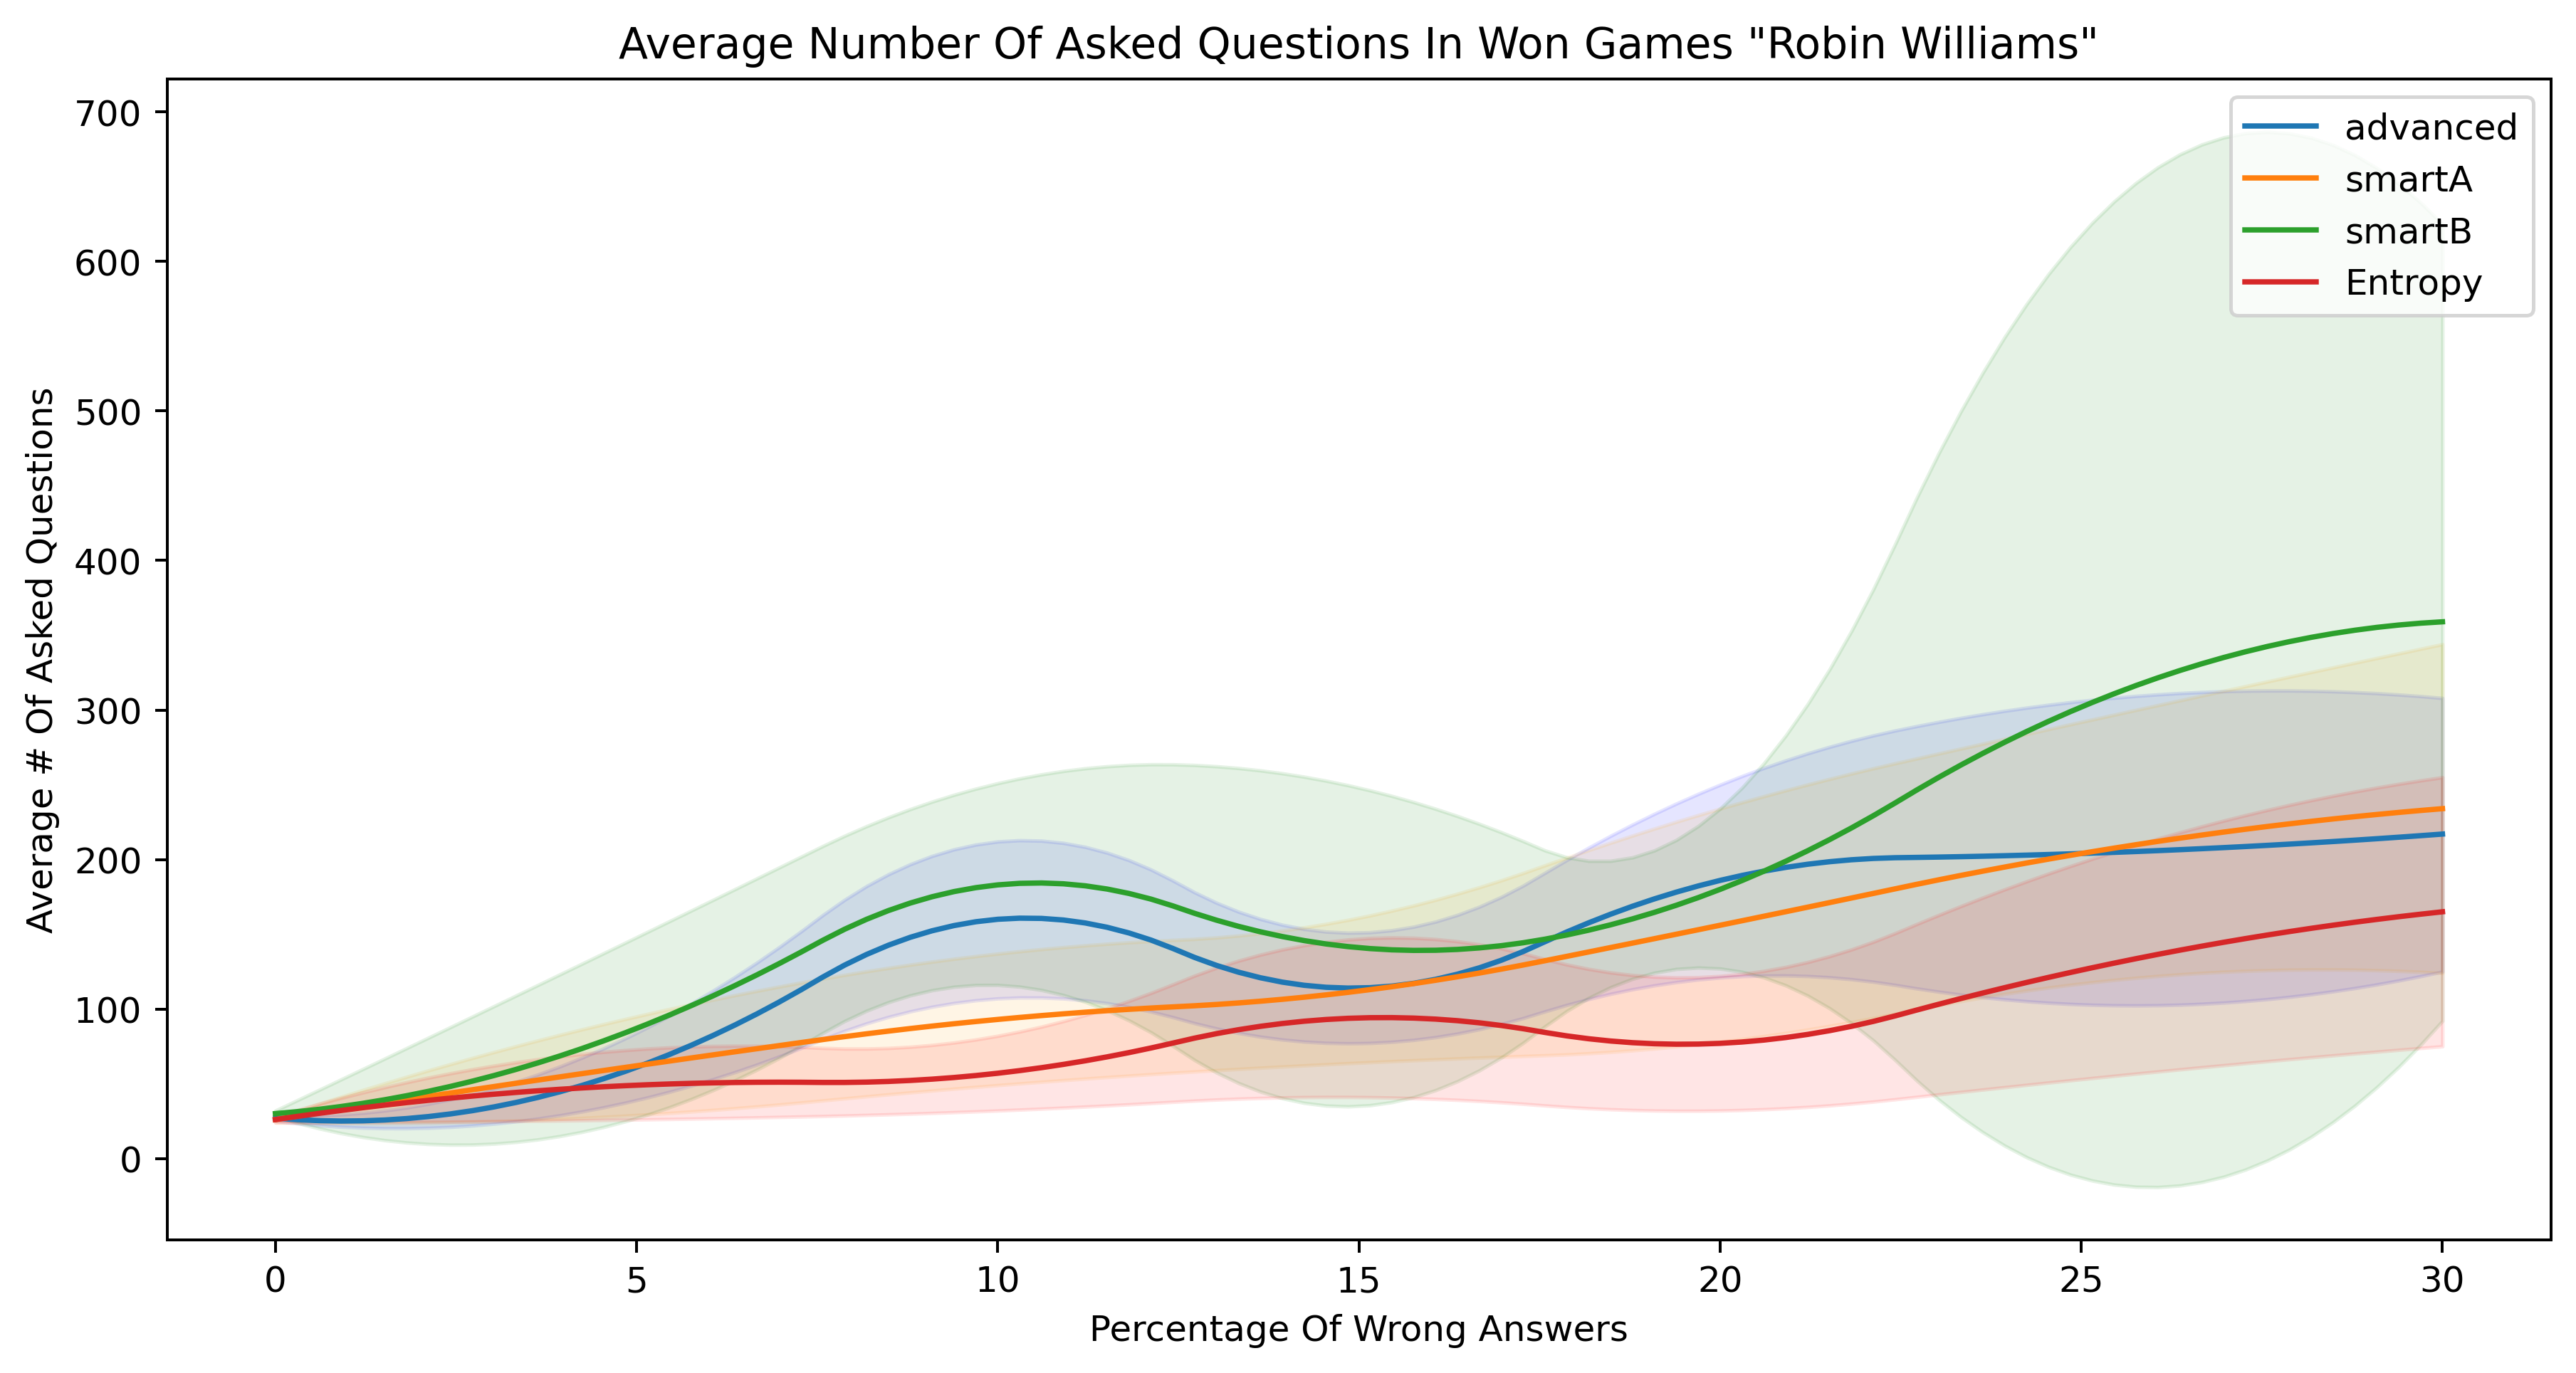

In [27]:
advanced_avgqw_low2 = [25,39,107,77,121,103,125]
advanced_avgqw_high2 = [29,84,212,151,250,306,308]

smartA_avgqw_low2 = [24,29,49,64,78,117,124]
smartA_avgqw_high2 = [27,95,137,161,234,292,344]

smartB_avgqw_low2 = [28,27,116,35,127,-13,92]
smartB_avgqw_high2 = [32,148,251,248,234,618,625]

entropy_avgqw_low2 = [24,26,32,41,32,53,75]
entropy_avgqw_high2 = [28,73,82,147,122,198,255]

advanced_avgqw2 = [27,61,160,114,186,204,217]
smartA_avgqw2 = [26,62,93,112,156,204,234]
smartB_avgqw2 = [30,87,183,141,180,302,359]
entropy_avgqw2 = [26,49,57,94,77,126,165]

plot_avg_n_questions(advanced_avgqw2, smartA_avgqw2, smartB_avgqw2, entropy_avgqw2, \
                     advanced_avgqw_low2, advanced_avgqw_high2, \
                     smartA_avgqw_low2, smartA_avgqw_high2, \
                     smartB_avgqw_low2, smartB_avgqw_high2, \
                     entropy_avgqw_low2, entropy_avgqw_high2, 'Average Number Of Asked Questions In Won Games "Robin Williams"')


## Entity 3:

3. number of won games # nwg

In [28]:
# advanced_nwg3 = []
# smartA_nwg3 = []
# smartB_nwg3 = []
# entropy_nwg3 = []

# plot_number_of_won_games(advanced_nwg3, smartA_nwg3, smartB_nwg3, entropy_nwg3, ' ')

3. Average Number Of Asked Questions # avgq

In [29]:
# advanced_avgq_low3 = []
# advanced_avgq_high3 = []

# smartA_avgq_low3 = []
# smartA_avgq_high3 = []

# smartB_avgq_low3 = []
# smartB_avgq_high3 = []

# entropy_avgq_low3 = []
# entropy_avgq_high3 = []

# advanced_avgq3 = []
# smartA_avgq3 = []
# smartB_avgq3 = []
# entropy_avgq3 = []

# plot_avg_n_questions(advanced_avgq3, smartA_avgq3, smartB_avgq3, entropy_avgq3, \
#                      advanced_avgq_low3, advanced_avgq_high3, \
#                      smartA_avgq_low3, smartA_avgq_high3, \
#                      smartB_avgq_low3, smartB_avgq_high3, \
#                      entropy_avgq_low3, entropy_avgq_high3, 'Average Number Of Asked Questions " "')

3. Average Number Of Asked Questions In Won Games # avgqw

In [30]:
# advanced_avgqw_low3 = []
# advanced_avgqw_high3 = []

# smartA_avgqw_low3 = []
# smartA_avgqw_high3 = []

# smartB_avgqw_low3 = []
# smartB_avgqw_high3 = []

# entropy_avgqw_low3 = []
# entropy_avgqw_high3 = []

# advanced_avgqw3 = []
# smartA_avgqw3 = []
# smartB_avgqw3 = []
# entropy_avgqw3 = []

# plot_avg_n_questions(advanced_avgqw3, smartA_avgqw3, smartB_avgqw3, entropy_avgqw3, \
#                      advanced_avgqw_low3, advanced_avgqw_high3, \
#                      smartA_avgqw_low3, smartA_avgqw_high3, \
#                      smartB_avgqw_low3, smartB_avgqw_high3, \
#                      entropy_avgqw_low3, entropy_avgqw_high3, 'Average Number Of Asked Questions In Won Games " "')


## Entity 4:

4. number of won games # nwg

In [31]:
# advanced_nwg4 = []
# smartA_nwg4 = []
# smartB_nwg4 = []
# entropy_nwg4 = []

# plot_number_of_won_games(advanced_nwg4, smartA_nwg4, smartB_nwg4, entropy_nwg4, ' ')

4. Average Number Of Asked Questions # avgq

In [32]:
# advanced_avgq_low4 = []
# advanced_avgq_high4 = []

# smartA_avgq_low4 = []
# smartA_avgq_high4 = []

# smartB_avgq_low4 = []
# smartB_avgq_high4 = []

# entropy_avgq_low4 = []
# entropy_avgq_high4 = []

# advanced_avgq4 = []
# smartA_avgq4 = []
# smartB_avgq4 = []
# entropy_avgq4 = []

# plot_avg_n_questions(advanced_avgq4, smartA_avgq4, smartB_avgq4, entropy_avgq4, \
#                      advanced_avgq_low4, advanced_avgq_high4, \
#                      smartA_avgq_low4, smartA_avgq_high4, \
#                      smartB_avgq_low4, smartB_avgq_high4, \
#                      entropy_avgq_low4, entropy_avgq_high4, 'Average Number Of Asked Questions " "')

4. Average Number Of Asked Questions In Won Games # avgqw

In [33]:
# advanced_avgqw_low4 = []
# advanced_avgqw_high4 = []

# smartA_avgqw_low4 = []
# smartA_avgqw_high4 = []

# smartB_avgqw_low4 = []
# smartB_avgqw_high4 = []

# entropy_avgqw_low4 = []
# entropy_avgqw_high4 = []

# advanced_avgqw4 = []
# smartA_avgqw4 = []
# smartB_avgqw4 = []
# entropy_avgqw4 = []

# plot_avg_n_questions(advanced_avgqw4, smartA_avgqw4, smartB_avgqw4, entropy_avgqw4, \
#                      advanced_avgqw_low4, advanced_avgqw_high4, \
#                      smartA_avgqw_low4, smartA_avgqw_high4, \
#                      smartB_avgqw_low4, smartB_avgqw_high4, \
#                      entropy_avgqw_low4, entropy_avgqw_high4, 'Average Number Of Asked Questions In Won Games " "')

## Entity 5:

5. number of won games # nwg

In [34]:
# advanced_nwg5 = []
# smartA_nwg5 = []
# smartB_nwg5 = []
# entropy_nwg5 = []

# plot_number_of_won_games(advanced_nwg5, smartA_nwg5, smartB_nwg5, entropy_nwg5, ' ')

5. Average Number Of Asked Questions # avgq

In [35]:
# advanced_avgq_low5 = []
# advanced_avgq_high5 = []

# smartA_avgq_low5 = []
# smartA_avgq_high5 = []

# smartB_avgq_low5 = []
# smartB_avgq_high5 = []

# entropy_avgq_low5 = []
# entropy_avgq_high5 = []

# advanced_avgq5 = []
# smartA_avgq5 = []
# smartB_avgq5 = []
# entropy_avgq5 = []

# plot_avg_n_questions(advanced_avgq5, smartA_avgq5, smartB_avgq5, entropy_avgq5, \
#                      advanced_avgq_low5, advanced_avgq_high5, \
#                      smartA_avgq_low5, smartA_avgq_high5, \
#                      smartB_avgq_low5, smartB_avgq_high5, \
#                      entropy_avgq_low5, entropy_avgq_high5, 'Average Number Of Asked Questions " "')

5. Average Number Of Asked Questions In Won Games # avgqw

In [18]:
# advanced_avgqw_low5 = []
# advanced_avgqw_high5 = []

# smartA_avgqw_low5 = []
# smartA_avgqw_high5 = []

# smartB_avgqw_low5 = []
# smartB_avgqw_high5 = []

# entropy_avgqw_low5 = []
# entropy_avgqw_high5 = []

# advanced_avgqw5 = []
# smartA_avgqw5 = []
# smartB_avgqw5 = []
# entropy_avgqw5 = []

# plot_avg_n_questions(advanced_avgqw5, smartA_avgqw5, smartB_avgqw5, entropy_avgqw5, \
#                      advanced_avgqw_low5, advanced_avgqw_high5, \
#                      smartA_avgqw_low5, smartA_avgqw_high5, \
#                      smartB_avgqw_low5, smartB_avgqw_high5, \
#                      entropy_avgqw_low5, entropy_avgqw_high5, 'Average Number Of Asked Questions In Won Games " "')

## Total performance throughout multiple entities

number of won games # nwg

In [ ]:
# advanced_nwg = average_lists([advanced_nwg1, advanced_nwg2, advanced_nwg3, advanced_nwg4, advanced_nwg5])
# smartA_nwg = average_lists([smartA_nwg1, smartA_nwg2, smartA_nwg3, smartA_nwg4, smartA_nwg5])
# smartB_nwg = average_lists([smartB_nwg1, smartB_nwg2, smartB_nwg3, smartB_nwg4, smartB_nwg5])
# entropy_nwg = average_lists([entropy_nwg1, entropy_nwg2, entropy_nwg3, entropy_nwg4, entropy_nwg5])

# plot_number_of_won_games(advanced_nwg, smartA_nwg, smartB_nwg, entropy_nwg, 'Total')

Average Number Of Asked Questions # avgq

In [ ]:
# advanced_avgq_low = average_lists([advanced_avgq_low1, advanced_avgq_low2, advanced_avgq_low3, advanced_avgq_low4, advanced_avgq_low5])
# advanced_avgq_high = average_lists([advanced_avgq_high1, advanced_avgq_high2, advanced_avgq_high3, advanced_avgq_high4, advanced_avgq_high5])

# smartA_avgq_low = average_lists([smartA_avgq_low1, smartA_avgq_low2, smartA_avgq_low3, smartA_avgq_low4, smartA_avgq_low5])
# smartA_avgq_high = average_lists([smartA_avgq_high1, smartA_avgq_high2, smartA_avgq_high3, smartA_avgq_high4, smartA_avgq_high5])

# smartB_avgq_low = average_lists([smartB_avgq_low1, smartB_avgq_low2, smartB_avgq_low3, smartB_avgq_low4, smartB_avgq_low5])
# smartB_avgq_high = average_lists([smartB_avgq_high1, smartB_avgq_high2, smartB_avgq_high3, smartB_avgq_high4, smartB_avgq_high5])

# entropy_avgq_low = average_lists([entropy_avgq_low1, entropy_avgq_low2, entropy_avgq_low3, entropy_avgq_low4, entropy_avgq_low5])
# entropy_avgq_high = average_lists([entropy_avgq_high1, entropy_avgq_high2, entropy_avgq_high3, entropy_avgq_high4, entropy_avgq_high5])

# advanced_avgq = average_lists([advanced_avgq1, advanced_avgq2, advanced_avgq3, advanced_avgq4, advanced_avgq5])
# smartA_avgq = average_lists([smartA_avgq1, smartA_avgq2, smartA_avgq3, smartA_avgq4, smartA_avgq5])
# smartB_avgq = average_lists([smartB_avgq1, smartB_avgq2, smartB_avgq3, smartB_avgq4, smartB_avgq5])
# entropy_avgq = average_lists([entropy_avgq1, entropy_avgq2, entropy_avgq3, entropy_avgq4, entropy_avgq5])

# plot_avg_n_questions(advanced_avgq, smartA_avgq, smartB_avgq, entropy_avgq, \
#                      advanced_avgq_low, advanced_avgq_high, \
#                      smartA_avgq_low, smartA_avgq_high, \
#                      smartB_avgq_low, smartB_avgq_high, \
#                      entropy_avgq_low, entropy_avgq_high, 'Average Number Of Asked Questions " "')

Average Number Of Asked Questions In Won Games # avgqw

In [ ]:
# advanced_avgqw_low = average_lists([advanced_avgqw_low1, advanced_avgqw_low2, advanced_avgqw_low3, advanced_avgqw_low4, advanced_avgqw_low5])
# advanced_avgqw_high = average_lists([advanced_avgqw_high1, advanced_avgqw_high2, advanced_avgqw_high3, advanced_avgqw_high4, advanced_avgqw_high5])

# smartA_avgqw_low = average_lists([smartA_avgqw_low1, smartA_avgqw_low2, smartA_avgqw_low3, smartA_avgqw_low4, smartA_avgqw_low5])
# smartA_avgqw_high = average_lists([smartA_avgqw_high1, smartA_avgqw_high2, smartA_avgqw_high3, smartA_avgqw_high4, smartA_avgqw_high5])

# smartB_avgqw_low = average_lists([smartB_avgqw_low1, smartB_avgqw_low2, smartB_avgqw_low3, smartB_avgqw_low4, smartB_avgqw_low5])
# smartB_avgqw_high = average_lists([smartB_avgqw_high1, smartB_avgqw_high2, smartB_avgqw_high3, smartB_avgqw_high4, smartB_avgqw_high5])

# entropy_avgqw_low = average_lists([entropy_avgqw_low1, entropy_avgqw_low2, entropy_avgqw_low3, entropy_avgqw_low4, entropy_avgqw_low5])
# entropy_avgqw_high = average_lists([entropy_avgqw_high1, entropy_avgqw_high2, entropy_avgqw_high3, entropy_avgqw_high4, entropy_avgqw_high5])

# advanced_avgqw = average_lists([advanced_avgqw1, advanced_avgqw2, advanced_avgqw3, advanced_avgqw4, advanced_avgqw5])
# smartA_avgqw = average_lists([smartA_avgqw1, smartA_avgqw2, smartA_avgqw3, smartA_avgqw4, smartA_avgqw5])
# smartB_avgqw = average_lists([smartB_avgqw1, smartB_avgqw2, smartB_avgqw3, smartB_avgqw4, smartB_avgqw5])
# entropy_avgqw = average_lists([entropy_avgqw1, entropy_avgqw2, entropy_avgqw3, entropy_avgqw4, entropy_avgqw5])

# plot_avg_n_qwuestions(advanced_avgqw, smartA_avgqw, smartB_avgqw, entropy_avgqw, \
#                      advanced_avgqw_low, advanced_avgqw_high, \
#                      smartA_avgqw_low, smartA_avgqw_high, \
#                      smartB_avgqw_low, smartB_avgqw_high, \
#                      entropy_avgqw_low, entropy_avgqw_high, 'Average Number Of Asked questions " "')